In [6]:
import pandas as pd
df = pd.read_csv("/home/aditya/Downloads/wdbc.data",header = None)
from  sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                   random_state = 1,
                                                   stratify = y)


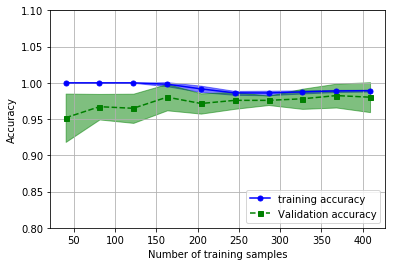

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
pipe_lr = make_pipeline(StandardScaler(),
                       LogisticRegression(penalty = "l2",
                                         random_state = 1,
                                         solver = "liblinear",
                                         multi_class = "auto"),
                       )
train_sizes, train_scores, test_scores =learning_curve(estimator = pipe_lr,
                                                       n_jobs = 1,
                                                       X = x_train,
                                                       y = y_train,
                                                       train_sizes = np.linspace(0.1,1.0,10),
                                                       cv = 10)

train_mean = np.mean(train_scores,axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis  = 1)

plt.plot(train_sizes, train_mean, color = "blue",
        marker = "o",markersize = 5, label = "training accuracy")

plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha = 0.5,
                color = "blue")
plt.plot(train_sizes, test_mean,
        color = "green", linestyle = "--",
        marker = "s",markersize = 5,
        label = "Validation accuracy")

plt.fill_between(train_sizes, 
                test_mean + test_std,
                test_mean - test_std,
                alpha = 0.5,
                color = "green")
plt.grid()
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.ylim([0.8,1.1])
plt.show()

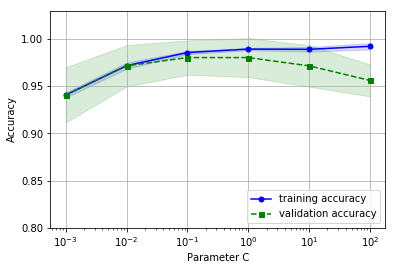

In [10]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=x_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.03])
plt.show()

Similar to *learning_curve*, the *validation_curve* also uses the stratified k-fold cross-validation to estimate the performance of the classifier. 
<br>
Inside the *validation_curve* we specified the parameter that we want to evaluate. In this case it is `C`
, we used the *logisticregression__C*.
<br>
<br>
One more parameters that is introduced here is the *param_range*.
<br>
`param_range` - in this case the `C` in the logistic regression takes the values that are in the param range one by one and *validation_curves* returns the respective *train score* and *test score*

# Important intuition about learning and validation curves

`Learning curve`  - **A learning curve shows how error changes as the training set size increases**
<br>
`Validation curve` - **Validation curves are related to learning curves, but instead of plotting training v test accuracy, we plot how the accuracy will vary if we changed some parameters instead, like `C` in case of logistic regression and also `gamma` in case of SVMs**


##### Learning curve for SVM 

In [25]:
from sklearn.svm import SVC
svm = SVC(gamma = 0.001)

from sklearn.model_selection import learning_curve
train_sizes, train_score, test_score = learning_curve(estimator=svm,
                                                     X = x_train,
                                                     y = y_train,
                                                     train_sizes = np.linspace(0.1,1.0,5),
                                                     cv = 10)
train_mean = np.mean(train_score, axis = 1)
train_std = np.std(train_score, axis = 1)
test_mean = np.mean(test_score, axis = 1)
test_std = np.std(test_score, axis = 1)

plt.plot(train_sizes, train_mean, color = "red", lw = 2, label = "Training curve",marker = "o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "salmon",alpha = 0.4)

plt.plot(train_sizes, test_mean, color = "blue", lw = 2, label = "Validation curve",marker = "o")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "lightblue",alpha = 0.4)
plt.ylim(0.7,1.01)
plt.grid()
plt.legend()
plt.show()

####  Validation curve of $\gamma$  in SVM

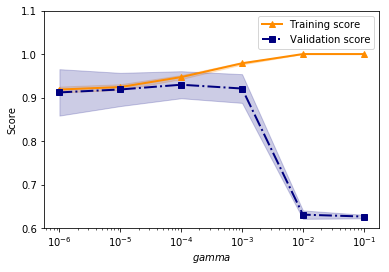

In [12]:
from sklearn.svm import SVC
svm = SVC()

from sklearn.model_selection import validation_curve
param_range = np.logspace(-6,-1,6, base = 10)

train_score, test_score = validation_curve(estimator=svm, 
                                           X = x_train,
                                           y = y_train,
                                           param_name='gamma',
                                           param_range = param_range,
                                           cv = 10,
                                           scoring = "accuracy"
                                          )

train_mean = np.mean(train_score, axis = 1)
test_mean  = np.mean(test_score, axis = 1)
train_std = np.std(train_score, axis = 1)
test_std = np.std(test_score, axis = 1)

plt.semilogx(param_range, train_mean, color = "darkorange", marker = "^",linestyle = "-",
        label = "Training score",lw = 2)
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha = 0.2, color = "darkorange")

plt.semilogx(param_range, test_mean, color = "navy", marker = "s", linestyle = "-.",
        label = "Validation score",lw = 2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color = "navy", alpha = 0.2)
plt.legend()
plt.xlabel("$gamma$")
plt.ylabel("Score")
plt.ylim(0.6,1.1)

plt.show()

##### Validation curve for `C` in SVM

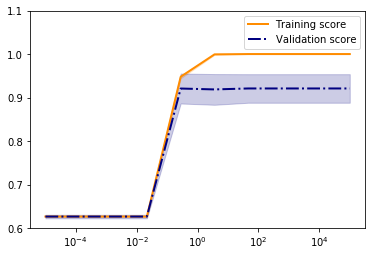

In [13]:
from sklearn.svm import SVC
svm = SVC(gamma = 10**-3, kernel = "rbf")

from sklearn.model_selection import validation_curve
param_range = np.logspace(-5,5,10,base = 10)
train_score, test_score = validation_curve(estimator=svm, 
                                           X = x_train,
                                           y = y_train,
                                           param_name='C',
                                           param_range = param_range,
                                           cv = 10,
                                           scoring = "accuracy"
                                          )

train_mean = np.mean(train_score, axis = 1)
test_mean  = np.mean(test_score, axis = 1)
train_std = np.std(train_score, axis = 1)
test_std = np.std(test_score, axis = 1)

plt.semilogx(param_range, train_mean, color = "darkorange",linestyle = "-",
        label = "Training score",lw = 2)
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha = 0.2, color = "darkorange")

plt.semilogx(param_range, test_mean, color = "navy", linestyle = "-.",
        label = "Validation score",lw = 2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color = "navy", alpha = 0.2)
plt.legend()
plt.ylim(0.6,1.1)

plt.show()